In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [13]:
features = pd.read_csv("out/features.csv")

In [14]:
features

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,category
0,-0.557070,-0.019155,0.609928,-0.747007,-0.114520,-0.871198,0.439319,2.052158,-0.562650,0.104768,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
1,-0.933051,-1.196877,1.004180,-0.092603,1.080126,0.350461,0.016069,-0.667254,0.469369,0.124314,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
2,-0.411102,-0.025800,1.125474,0.368219,-0.357782,0.761698,1.032254,-1.289710,0.387716,0.019500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,0.371526,0.479693,-0.265036,-0.141430,0.636054,-0.706118,-0.179953,0.147710,-1.403985,0.245707,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
4,-0.645995,0.789765,1.045137,-0.666642,1.468103,-0.110501,1.042018,-0.396656,0.253728,0.353600,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1552,0.557038,-0.347518,0.443285,-0.116433,0.277560,-0.783614,-0.017489,0.172966,-0.311353,0.118668,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1553,0.415283,-0.765457,-0.466596,-0.058687,-1.148510,-0.028676,-1.663247,-0.425824,0.071599,0.627155,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1554,-0.323091,-0.303320,0.945461,-0.128471,-0.388292,-1.119184,-0.627639,-1.415517,0.980315,0.353038,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
1555,-1.222756,0.360259,0.651363,-0.749212,0.366402,0.047080,0.067332,-0.180457,0.143387,0.296101,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [15]:
features["category"].unique()

array([6, 2, 0, 1, 4, 5, 3])

In [15]:
features[features < 0] = 0

In [17]:
kf = KFold(n_splits=5, shuffle=True)
split = kf.split(features.iloc[:,0:99], features.iloc[:,100])

In [22]:
kf = KFold(n_splits=5, shuffle=True)
split = kf.split(features.iloc[:,0:99], features.iloc[:,100])
fscores = []
acc = []
w_avg = []
m_avg = []
n_replications = 1

for train_index, test_index in split:
  for i in range(n_replications):
    print("Replication: ", i)
    X_train, Y_train = features.loc[train_index].iloc[:, :99], features.loc[train_index].iloc[:, 100] 
    x_test, y_test = features.loc[test_index].iloc[:, :99], features.loc[test_index].iloc[:, 100]

    model = svm.SVC(kernel="linear", decision_function_shape='ovo',  class_weight="balanced")
    model.fit(X_train, Y_train)
    
    y_predicted = model.predict(x_test)
    precision, recall, fscore, support = score(y_test, y_predicted)
    acc.append(accuracy_score(y_test, y_predicted))
    print("Fscore:", fscore)
    print("Acc:", acc)
    fscores.append(fscore)
    w_avg.append(f1_score(y_test, y_predicted, average='weighted'))
    m_avg.append(f1_score(y_test, y_predicted, average='macro'))


Replication:  0
Fscore: [0.1978022  0.08       0.15827338 0.03636364 0.12121212 0.12612613
 0.06451613]
Acc: [0.12179487179487179]
Replication:  0
Fscore: [0.1682243  0.11235955 0.19858156 0.03225806 0.03921569 0.07476636
 0.02985075]
Acc: [0.12179487179487179, 0.11217948717948718]
Replication:  0
Fscore: [0.16091954 0.03125    0.19178082 0.05555556 0.11904762 0.03960396
 0.02941176]
Acc: [0.12179487179487179, 0.11217948717948718, 0.10289389067524116]
Replication:  0
Fscore: [0.18604651 0.06896552 0.22641509 0.03508772 0.1038961  0.07207207
 0.16216216]
Acc: [0.12179487179487179, 0.11217948717948718, 0.10289389067524116, 0.1382636655948553]
Replication:  0
Fscore: [0.21176471 0.02380952 0.19047619 0.1627907  0.         0.10344828
 0.03389831]
Acc: [0.12179487179487179, 0.11217948717948718, 0.10289389067524116, 0.1382636655948553, 0.12218649517684887]


In [23]:
kf = KFold(n_splits=5, shuffle=True)
split = kf.split(features.iloc[:,0:99], features.iloc[:,100])

fscores, precisions, recalls = [], [], []

acc = []
w_avg_f = []
m_avg_f = []

w_avg_p = []
m_avg_p = []

w_avg_r = []
m_avg_r = []

n_replications = 1
fold = 1

for train_index, test_index in split:
  for i in range(n_replications):
    print("Replication: ", i)
    print("Fold: ", fold)
    X_train, Y_train = features.loc[train_index].iloc[:, :99], features.loc[train_index].iloc[:, 100] 
    x_test, y_test = features.loc[test_index].iloc[:, :99], features.loc[test_index].iloc[:, 100]
    
    clf = RandomForestClassifier()
    clf.fit(X_train, Y_train)


    y_predicted = clf.predict(x_test)
    precision, recall, fscore, support = score(y_test, y_predicted)
    acc.append(accuracy_score(y_test, y_predicted))
    
    fscores.append(fscore)
    precisions.append(precision)
    recalls.append(recall)
    
    w_avg_f.append(f1_score(y_test, y_predicted, average='weighted'))
    m_avg_f.append(f1_score(y_test, y_predicted, average='macro'))

    w_avg_p.append(precision_score(y_test, y_predicted, average='weighted'))
    m_avg_p.append(precision_score(y_test, y_predicted, average='macro'))

    w_avg_r.append(recall_score(y_test, y_predicted, average='weighted'))
    m_avg_r.append(recall_score(y_test, y_predicted, average='macro'))
  
  fold += 1

    

Replication:  0
Fold:  1


/home/paulo/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/paulo/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/paulo/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Replication:  0
Fold:  2


/home/paulo/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/paulo/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/paulo/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Replication:  0
Fold:  3


/home/paulo/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/paulo/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/paulo/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Replication:  0
Fold:  4


/home/paulo/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/paulo/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/paulo/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Replication:  0
Fold:  5


/home/paulo/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/paulo/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/paulo/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
metrics_f = pd.DataFrame(fscores, columns = ["0_fscore", "1_fscore", "2_fscore", "3_fscore", "4_fscore", "5_fscore", "6_fscore"])
metrics_p = pd.DataFrame(precisions, columns = ["0_fscore", "1_fscore", "2_fscore", "3_fscore", "4_fscore", "5_fscore", "6_fscore"])
metrics_r = pd.DataFrame(recalls, columns = ["0_fscore", "1_fscore", "2_fscore", "3_fscore", "4_fscore", "5_fscore", "6_fscore"])

In [25]:
metrics_f["accuracy"] = acc
metrics_f["weighted avg"] = w_avg_f
metrics_f["macro avg"] = m_avg_f

metrics_p["weighted avg"] = w_avg_p
metrics_p["macro avg"] = m_avg_p

metrics_r["weighted avg"] = w_avg_r
metrics_r["macro avg"] = m_avg_r



In [20]:
metrics_f.to_csv("/content/drive/My Drive/gowalla_texas_result_f_10.csv", index=None)
metrics_p.to_csv("/content/drive/My Drive/gowalla_texas_result_p_10.csv", index=None)
metrics_r.to_csv("/content/drive/My Drive/gowalla_texas_result_r_10.csv", index=None)

In [27]:
metrics_f

,0_fscore,1_fscore,2_fscore,3_fscore,4_fscore,5_fscore,6_fscore,accuracy,weighted avg,macro avg
0,0.038462,0.0,0.450980,0.0,0.0,0.330097,0.0,0.333333,0.264277,0.117077
1,0.000000,0.0,0.451220,0.0,0.0,0.306878,0.0,0.330128,0.251253,0.108300
2,0.000000,0.0,0.503030,0.0,0.0,0.281081,0.0,0.350482,0.267540,0.112016
3,0.000000,0.0,0.498442,0.0,0.0,0.334975,0.0,0.366559,0.293020,0.119060
4,0.000000,0.0,0.550898,0.0,0.0,0.402062,0.0,0.421222,0.338638,0.136137


In [ ]:
metrics

,0_fscore,1_fscore,2_fscore,3_fscore,4_fscore,5_fscore,6_fscore,7_fscore,accuracy,weighted_avg_fscore,macro_avg_fscore
0,0.375353,0.305323,0.173187,0.273416,0.153315,0.145859,0.135529,0.315789,0.268059,0.277172,0.234721
1,0.378663,0.315651,0.151644,0.263461,0.146751,0.144030,0.103743,0.275212,0.261509,0.271984,0.222394
2,0.374327,0.314810,0.189893,0.251793,0.128321,0.138924,0.124538,0.301056,0.261984,0.270015,0.227958
3,0.376526,0.303046,0.155650,0.248558,0.144908,0.135957,0.130192,0.312274,0.259801,0.267318,0.225889
4,0.369451,0.314233,0.180672,0.251810,0.163413,0.135736,0.119898,0.280374,0.261249,0.268909,0.226948


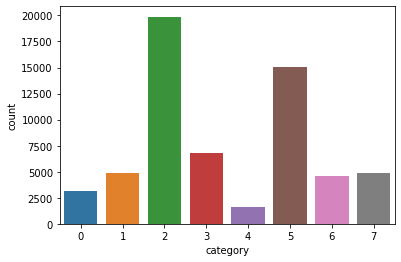

In [ ]:
sns.countplot(data=features,
              x="category")

In [ ]:
features.iloc[:, 100].value_counts()

1    1799
2    1350
4     856
5     830
3     686
0     307
6     172
Name: category, dtype: int64

In [ ]:
features.iloc[:, 100].value_counts()

1    5064
2    4188
4    2775
5    2643
3    2363
0     864
6     506
Name: category, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features.iloc[:, 0:99],
                                                    features.iloc[:, 100], 
                                                    test_size=0.30, 
                                                    random_state=42)
for i in [10, 20, 30, 40, 50]:
  model = SVC(kernel="linear", decision_function_shape='ovo', C=i)
  model.fit(X_train, y_train)
  y_predicted = model.predict(X_test)

  precision, recall, fscore, support = score(y_test, y_predicted)
  print(accuracy_score(y_test, y_predicted))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.3787357362796595


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.38489404093461327


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.38435066111211735


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.38634305379460243
0.3857996739721065


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
features.iloc[:, 100].unique()

array([0, 2, 7, 5, 3, 6, 1, 4])